In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
adult_df = pd.read_csv('/content/adult_with_headers.csv')

In [8]:
print(adult_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [9]:
print(adult_df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [10]:
print(adult_df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [11]:
adult_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [12]:
adult_df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [13]:
numerical_cols = adult_df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:\n", numerical_cols)

Numerical Columns:
 Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [15]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
adult_df_standard_scaled = adult_df.copy()
adult_df_standard_scaled[numerical_cols] = scaler_standard.fit_transform(adult_df[numerical_cols])
print("Standard Scaling Applied.")

Standard Scaling Applied.


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
adult_df_minmax_scaled = adult_df.copy()
adult_df_minmax_scaled[numerical_cols] = scaler_minmax.fit_transform(adult_df[numerical_cols])
print("Min-Max Scaling Applied.")

Min-Max Scaling Applied.


In [17]:
# Display the scaled columns for comparison
print("Original Data (first 5 rows):\n", adult_df[numerical_cols].head())
print("Standard Scaled Data (first 5 rows):\n", adult_df_standard_scaled[numerical_cols].head())
print("Min-Max Scaled Data (first 5 rows):\n", adult_df_minmax_scaled[numerical_cols].head())

Original Data (first 5 rows):
    age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40
Standard Scaled Data (first 5 rows):
         age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429 

In [20]:
# Identify categorical columns
categorical_cols = adult_df.select_dtypes(include=['object']).columns
print("Categorical columns:\n", categorical_cols)


Categorical columns:
 Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


In [21]:
# Check the number of unique categories in each categorical column
unique_counts = adult_df[categorical_cols].nunique()
print("Unique category counts:\n", unique_counts)

# Columns for One-Hot Encoding
one_hot_cols = unique_counts[unique_counts <= 5].index
print("Columns for One-Hot Encoding:", one_hot_cols)

# Columns for Label Encoding
label_cols = unique_counts[unique_counts > 5].index
print("Columns for Label Encoding:", label_cols)

Unique category counts:
 workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64
Columns for One-Hot Encoding: Index(['race', 'sex', 'income'], dtype='object')
Columns for Label Encoding: Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'native_country'],
      dtype='object')


In [22]:
# Check the number of unique categories in each categorical column
unique_counts = adult_df[categorical_cols].nunique()
print("Unique category counts:\n", unique_counts)

# Columns for One-Hot Encoding
one_hot_cols = ['race', 'sex', 'income']
print("Columns for One-Hot Encoding:", one_hot_cols)

# Columns for Label Encoding
label_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']
print("Columns for Label Encoding:", label_cols)


Unique category counts:
 workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64
Columns for One-Hot Encoding: ['race', 'sex', 'income']
Columns for Label Encoding: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']


In [23]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

# Apply One-Hot Encoding to each column with <= 5 categories
for col in one_hot_cols:
    # Fit and transform the data
    encoded_cols = one_hot_encoder.fit_transform(adult_df[[col]])
    # Get feature names from OneHotEncoder and create DataFrame
    feature_names = one_hot_encoder.get_feature_names_out([col])
    encoded_cols_df = pd.DataFrame(encoded_cols, columns=feature_names)
    # Drop original column and concatenate encoded columns
    adult_df.drop(col, axis=1, inplace=True)
    adult_df = pd.concat([adult_df, encoded_cols_df], axis=1)

print("One-Hot Encoding applied to columns:", one_hot_cols)

One-Hot Encoding applied to columns: ['race', 'sex', 'income']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each column with > 5 categories
for col in label_cols:
    adult_df[col] = label_encoder.fit_transform(adult_df[col])

print("Label Encoding applied to columns:", label_cols)

Label Encoding applied to columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']


In [25]:
# Display the first few rows of the encoded DataFrame
print("Encoded DataFrame:\n", adult_df.head())

Encoded DataFrame:
    age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           1             1          2174             0              40   
1           4             0             0             0              13   
2           6             1             0             0              40   
3           6             0             0             0              40   
4          10             5             0             0              40   

   native_country  race_ Asian-Pac-Islander  race_ Black  race_ Other  \
0              39            

In [26]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']

# Create age group feature using pd.cut
adult_df['age_group'] = pd.cut(adult_df['age'], bins=bins, labels=labels, right=False)


In [27]:
# Define bins and labels for working hours categories
bins_hours = [0, 20, 40, 60, 100]
labels_hours = ['Part-time', 'Full-time', 'Over-time', 'Workaholic']

# Create working hours category feature using pd.cut
adult_df['work_hours_category'] = pd.cut(adult_df['hours_per_week'], bins=bins_hours, labels=labels_hours, right=False)


In [28]:
adult_df['log_capital_gain'] = np.log(adult_df['capital_gain'] + 1)  # Adding 1 to handle zero values


In [29]:
print("Transformed DataFrame:")
print(adult_df.head())  # Print the first few rows to check


Transformed DataFrame:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  capital_gain  capital_loss  ...  native_country  \
0           1             1          2174             0  ...              39   
1           4             0             0             0  ...              39   
2           6             1             0             0  ...              39   
3           6             0             0             0  ...              39   
4          10             5             0             0  ...               5   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  s

In [30]:
adult_df['family_size'] = adult_df['relationship'] + adult_df['marital_status']

In [32]:
adult_df['education_level'] = adult_df['education'] * adult_df['education_num']

In [31]:
adult_df['log_capital_gain'] = np.log(adult_df['capital_gain'] + 1)

In [33]:
print("Transformed DataFrame:")
print(adult_df[['capital_gain', 'log_capital_gain']].head())

Transformed DataFrame:
   capital_gain  log_capital_gain
0          2174          7.684784
1             0          0.000000
2             0          0.000000
3             0          0.000000
4             0          0.000000


In [34]:
from sklearn.ensemble import IsolationForest

# Assuming adult_df is your DataFrame and you want to detect outliers in numeric columns
# Specify numeric columns for outlier detection (adjust as per your dataset)
numeric_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Initialize Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination based on your dataset

# Fit model and predict outliers
adult_df['outlier'] = iso_forest.fit_predict(adult_df[numeric_cols])

# Filter out non-outliers
adult_df_clean = adult_df[adult_df['outlier'] == 1].copy()

# Remove outlier flag column
adult_df_clean.drop('outlier', axis=1, inplace=True)

# Display cleaned DataFrame
print("DataFrame after outlier removal:")
print(adult_df_clean.head())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


DataFrame after outlier removal:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  capital_gain  capital_loss  ...  race_ Black  \
0           1             1          2174             0  ...          0.0   
1           4             0             0             0  ...          0.0   
2           6             1             0             0  ...          0.0   
3           6             0             0             0  ...          1.0   
4          10             5             0             0  ...          1.0   

   race_ Other  race_ White  sex_ Male  income_ >50K  age_group  \
0         

In [1]:
!pip install ppscore


In [2]:
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt


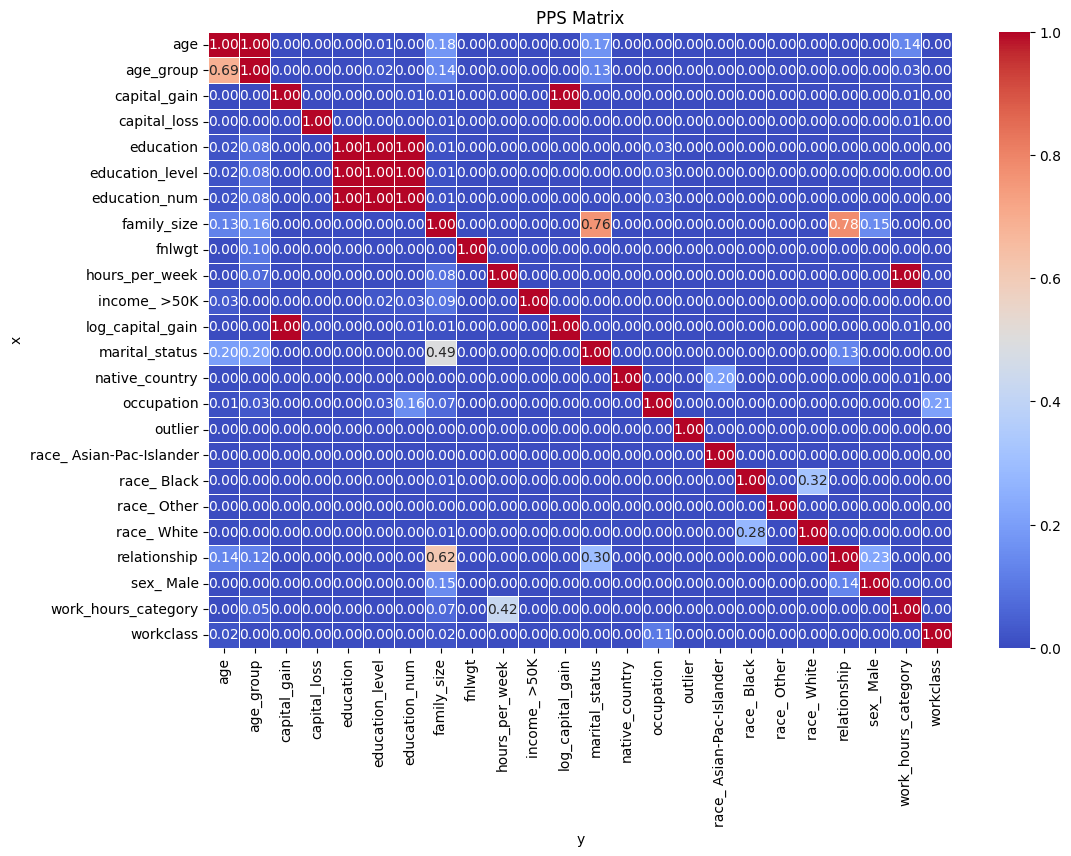

In [39]:
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming adult_df is your DataFrame containing the dataset
# Calculate PPS matrix for all features
pps_matrix = pps.matrix(adult_df)

# Pivot the PPS matrix to the correct format for a heatmap
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')

# Replace NaN with 0
pps_pivot = pps_pivot.fillna(0)

# Plotting the PPS matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pps_pivot, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('PPS Matrix')
plt.show()


<ipython-input-40-ea217852d98b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = adult_df.corr()


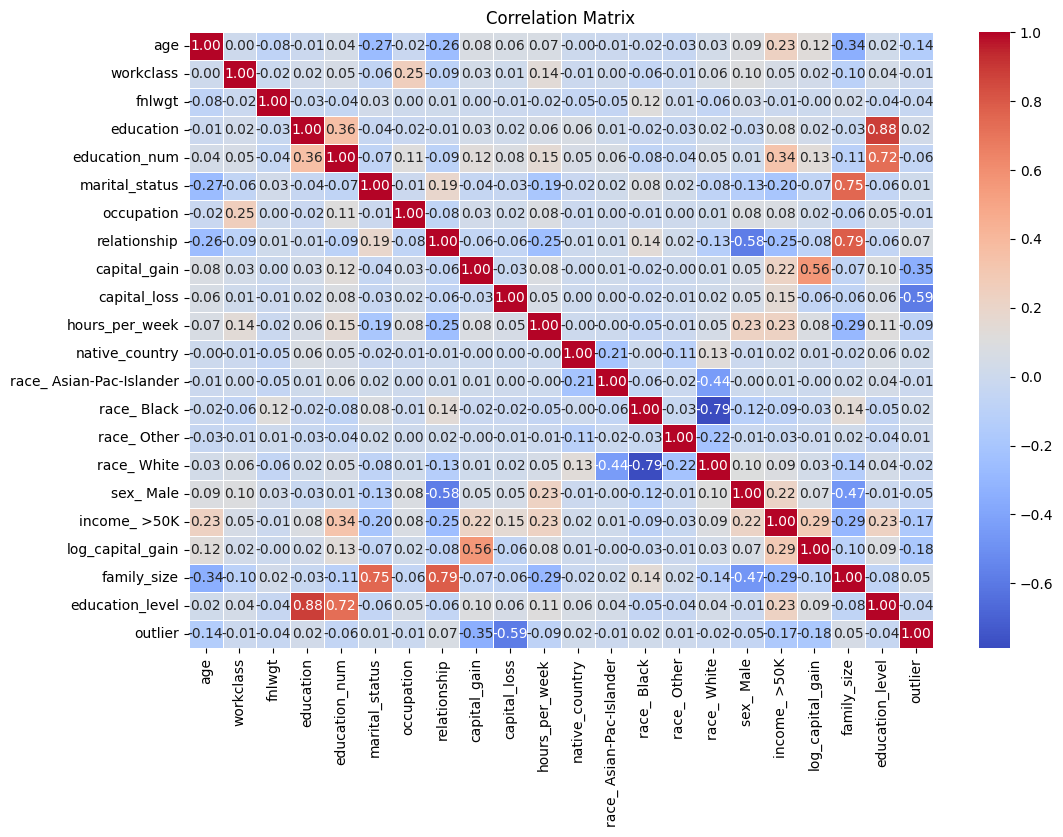

In [40]:
# Calculate the correlation matrix
corr_matrix = adult_df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
